<a href="https://colab.research.google.com/github/Xitij248/GenerativeAI-Timespro/blob/main/Kshitij_1st_assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1

In [23]:
# Create a pandas DataFrame
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)

# Add the target variable to the DataFrame
df['median_house_value'] = california_housing.target

# Display the first 5 rows
display(df.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [24]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:")
print(X_train.shape, y_train.shape)
print("\nTesting data shape:")
print(X_test.shape, y_test.shape)

Training data shape:
(16512, 8) (16512,)

Testing data shape:
(4128, 8) (4128,)


In [26]:
# testing the trained model
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
print("Linear model training complete.")
print(y_pred)

Linear model training complete.
[0.71912284 1.76401657 2.70965883 ... 4.46877017 1.18751119 2.00940251]


### Applying Ridge Regression

In [38]:
from sklearn.linear_model import Ridge

# Create a Ridge regression model
ridge_model = Ridge(alpha=509) # You can adjust the alpha value

# Train the Ridge model using the training data
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
print("Ridge model training complete.")
print(y_pred_ridge)

Ridge model training complete.
[0.76667877 1.73945959 2.56487277 ... 4.42239792 1.29146218 1.93773345]


### Applying Lasso Regression

In [33]:
from sklearn.linear_model import Lasso

# Create a Lasso regression model
lasso_model = Lasso(alpha=0.01) # You can adjust the alpha value

# Train the Lasso model using the training data
lasso_model.fit(X_train, y_train)
y_pred_lasso  = lasso_model.predict(X_test)
print("Lasso model training complete.")
print(y_pred_lasso)

Lasso model training complete.
[0.75752714 1.74391678 2.56439334 ... 4.42843928 1.28252423 1.93771376]


Comparison between Ridge and Lassso

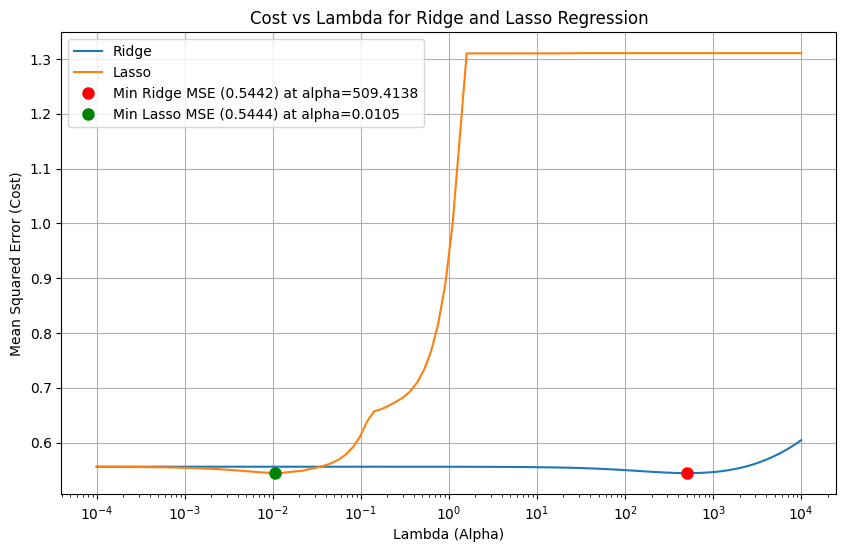

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

# Define a range of alpha values
alphas = np.logspace(-4, 4, 100)

# Initialize lists to store costs
ridge_costs = []
lasso_costs = []

# Calculate costs for Ridge regression
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_test)
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    ridge_costs.append(mse_ridge)

# Calculate costs for Lasso regression
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_test)
    mse_lasso = mean_squared_error(y_test, y_pred_lasso)
    lasso_costs.append(mse_lasso)

# Find the minimum MSE and corresponding alpha for Ridge
min_ridge_mse = min(ridge_costs)
min_ridge_alpha = alphas[ridge_costs.index(min_ridge_mse)]

# Find the minimum MSE and corresponding alpha for Lasso
min_lasso_mse = min(lasso_costs)
min_lasso_alpha = alphas[lasso_costs.index(min_lasso_mse)]

# Plot the costs
plt.figure(figsize=(10, 6))
plt.plot(alphas, ridge_costs, label='Ridge')
plt.plot(alphas, lasso_costs, label='Lasso')

# Plot markers for the minimum MSE points
plt.plot(min_ridge_alpha, min_ridge_mse, 'o', color='red', markersize=8, label=f'Min Ridge MSE ({min_ridge_mse:.4f}) at alpha={min_ridge_alpha:.4f}')
plt.plot(min_lasso_alpha, min_lasso_mse, 'o', color='green', markersize=8, label=f'Min Lasso MSE ({min_lasso_mse:.4f}) at alpha={min_lasso_alpha:.4f}')


plt.xscale('log')
plt.xlabel('Lambda (Alpha)')
plt.ylabel('Mean Squared Error (Cost)')
plt.title('Cost vs Lambda for Ridge and Lasso Regression')
plt.legend()
plt.grid(True)
plt.show()

Min error for lasso regression @ alpha = 0.0105
Min error for ridge regression @ alpha = 509.413